#### Use API Key to retrive data from Yelp

In [1]:
import pandas as pd
import numpy as np
import json
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
CLIENT_ID = "dpCAJD_dlXFa-j_e4Wkd2A"
API_KEY = "zXWCW6n0ivUP6TYTG-q72MmKeAaFDo8TF0Mk9E73MxfBui9pJj_VlOVHHWVn1W7kOjy4t_jA84DjaqHG3KuQIbG79atOUjpo4WIACKTtiSrxuwwrh_hEyK4pWleBXHYx"

In [3]:
API_HOST = 'https://api.yelp.com' #The API url header
SEARCH_PATH = '/v3/businesses/search' #The path for an API request to find businesses
BUSINESS_PATH = '/v3/businesses/'  # The path to get data for a single business

#### NOTE: Manhattan has about 20,000 Restaurants

#### SAMPLE: 1000 restaurants in "Manhattan"

In [11]:
def get_restaurants(api_key,location):
    import requests
    data = []
    # Retrive business information from yelp
    # Change UPPER BOUND in offset 
    for offset in range(0,500000,50):
        search_data = {
        'term': "restaurant",
        'location': location.replace(' ', '+'),
        'limit': 50,
        'offset':offset
        }
        url = API_HOST + SEARCH_PATH
        headers = {
            'Authorization': 'Bearer %s' % api_key,
        }
        response = requests.request('GET', url, headers=headers, params=search_data)
        if response.status_code == 200:
            data += response.json().get('businesses')
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    return data

In [12]:
restaurant = get_restaurants(API_KEY,"Manhattan, New York, NY")
print('Number of Restaurants:',len(restaurant))

400 Bad Request
Number of Restaurants: 1000


In [15]:
business=pd.DataFrame(restaurant)
# business[-20:]

In [ ]:
# IN FINAL OUTPUT, use API to get reastaurant = get_restaurant()
# business = clean(restaurant)

### DATA PREPROCESSING

In [21]:
def clean(df):
    business=pd.DataFrame(df)
    # Convert the price symbol indicators to the categorical levels
    business['price_num']=np.where(business['price']=='$',int(1),
                               (np.where(business['price']=='$$',2,
                                         (np.where(business['price']=='$$$',3,
                                                   (np.where(business['price']=='$$$$',4,0)))))))
    N = len(business)
    price_avg = np.sum(business['price_num'])/(N - business.groupby('price_num').size()[0])
    price_avg = round(price_avg, 2)
    # Replace nan with average pice number
    business['price_num'] = np.where(business['price_num'] == 0, price_avg, business['price_num'])
    #--------------------------------------------------
    # Clean-up the resturant 'categories' column
    business['categories'] = business['categories'].apply(lambda x: [x[j]['alias'] for j in range(len(x))])
    #--------------------------------------------------
    # Clean-up resturant address
    def addr(x):
        addr = ''
        for i in range(len(x['display_address'])-1):
            addr += x['display_address'][i] + ', '
        addr += x['display_address'][-1]
        return addr
    business['address'] = business['location'].apply(lambda x: addr(x))
    #----------------------------------------------------
    # Extract zipcode from address column to new column
    business['zip'] = business['address'].apply(lambda x: x[-5:])
#     index = business[(business.zip>'10099')&(business.zip!='10128')&(business.zip!='10280')].index
#     business.drop(index,inplace=True)
    #----------------------------------------------------
    # Extract Longitude & Latitude Information
    # New Columns
    business['latitude'] = business['coordinates'].apply(lambda x:x['latitude'])
    business['longitude'] = business['coordinates'].apply(lambda y:y['longitude'])
    #----------------------------------------------------
    #Clean-up Transaction Column --> 3 columns T/F to indicate type of transactions a restaurante registered for
    # 3 types of Yelp transactions: pickup, delivery, restaurant_reservation.
    business['pickup'] = business['transactions'].apply(lambda x: 'pickup' in x)
    business['delivery'] = business['transactions'].apply(lambda x: 'delivery' in x)
    business['restaurant_reservation'] = business['transactions'].apply(lambda x: 'restaurant_reservation' in x)
    
    return business

#### Use Our Saved Restaurant Examples now

In [9]:
df = pd.read_pickle("./original_1000.pkl")

In [22]:
business = clean(restaurant)
business

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,...,transactions,url,price_num,address,zip,latitude,longitude,pickup,delivery,restaurant_reservation
0,barn-joo-35-new-york,"[korean, gastropubs, tapasmallplates]","{'latitude': 40.74964, 'longitude': -73.98582}",(212) 564-4430,1325.406263,xZ96vaoL-cQjfotmUKtjJQ,https://s3-media1.fl.yelpcdn.com/bphoto/1R5CgY...,False,"{'address1': '34 W 35th St', 'address2': '', '...",Barn Joo 35,...,"[pickup, restaurant_reservation, delivery]",https://www.yelp.com/biz/barn-joo-35-new-york?...,2.00,"34 W 35th St, New York, NY 10001",10001,40.749640,-73.985820,True,True,True
1,chama-mama-new-york,[georgian],"{'latitude': 40.7384, 'longitude': -73.99892}",(646) 438-9007,2966.180331,cTE0e96GYzet799EJeStoQ,https://s3-media3.fl.yelpcdn.com/bphoto/qRZaBn...,False,"{'address1': '149 W 14th St', 'address2': None...",Chama Mama,...,[],https://www.yelp.com/biz/chama-mama-new-york?a...,2.15,"149 W 14th St, New York, NY 10011",10011,40.738400,-73.998920,False,False,False
2,jacobs-pickles-new-york,"[comfortfood, southern, tradamerican]","{'latitude': 40.7866504411994, 'longitude': -7...",(212) 470-5566,2950.127195,xt4sa64WOrpJvZBDPNPNYg,https://s3-media2.fl.yelpcdn.com/bphoto/167Rl2...,False,"{'address1': '509 Amsterdam Ave', 'address2': ...",Jacob's Pickles,...,[],https://www.yelp.com/biz/jacobs-pickles-new-yo...,2.00,"509 Amsterdam Ave, New York, NY 10024",10024,40.786650,-73.975528,False,False,False
3,amélie-new-york,"[french, wine_bars]","{'latitude': 40.7327, 'longitude': -73.99766}",(212) 533-2962,3464.466994,ETgJqJHV7BW6pIr9Ox74sA,https://s3-media4.fl.yelpcdn.com/bphoto/cSDgVu...,False,"{'address1': '22 W 8th St', 'address2': '', 'a...",Amélie,...,[restaurant_reservation],https://www.yelp.com/biz/am%C3%A9lie-new-york?...,2.00,"22 W 8th St, New York, NY 10011",10011,40.732700,-73.997660,False,False,True
4,upstate-new-york-2,"[seafood, wine_bars, beerbar]","{'latitude': 40.7263139141197, 'longitude': -7...",(646) 791-5400,3829.239035,ehUuSk5gPTCQmwS_ubgKRA,https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU...,False,"{'address1': '95 1st Ave', 'address2': '', 'ad...",Upstate,...,[restaurant_reservation],https://www.yelp.com/biz/upstate-new-york-2?ad...,2.00,"95 1st Ave, New York, NY 10003",10003,40.726314,-73.986490,False,False,True
5,burger-and-lobster-new-york-4,"[seafood, burgers, newamerican]","{'latitude': 40.74007, 'longitude': -73.99344}",(646) 833-7532,2569.517134,UA2M9QFZghe-9th2KwLoWQ,https://s3-media3.fl.yelpcdn.com/bphoto/1rHd7F...,False,"{'address1': '39 W 19th St', 'address2': '', '...",Burger & Lobster,...,"[pickup, restaurant_reservation, delivery]",https://www.yelp.com/biz/burger-and-lobster-ne...,2.00,"39 W 19th St, New York, NY 10011",10011,40.740070,-73.993440,True,True,True
6,district-social-new-york,"[bars, newamerican]","{'latitude': 40.75369, 'longitude': -73.99136}",(212) 994-9599,1304.929447,eTR6nfHvQzvKX7Dcd6JrfA,https://s3-media4.fl.yelpcdn.com/bphoto/1H7eai...,False,"{'address1': '252 W 37th St', 'address2': None...",District Social,...,[restaurant_reservation],https://www.yelp.com/biz/district-social-new-y...,2.00,"252 W 37th St, New York, NY 10018",10018,40.753690,-73.991360,False,False,True
7,bea-new-york,"[newamerican, cocktailbars]","{'latitude': 40.7591968, 'longitude': -73.9923...",(212) 602-1910,1170.800689,Rc1lxc5lSKJYd162JHNMfQ,https://s3-media2.fl.yelpcdn.com/bphoto/MsmtaE...,False,"{'address1': '403 W 43rd St', 'address2': '', ...",Bea,...,[restaurant_reservation],https://www.yelp.com/biz/bea-new-york?adjust_c...,2.00,"403 W 43rd St, New York, NY 10036",10036,40.759197,-73.992336,False,False,True
8,bh-kitchen-and-bar-new-york,"[tradamerican, cocktailbars, wine_bars]","{'latitude': 40.75734, 'longitude': -73.97656}",(212) 755-2166,358.599118,6MgQz0SEOYUih2N5JOa6rg,https://s3-media4.fl.yelpcdn.com/bphoto/fJKeuH...,False,"{'address1': '20 E 49th St', 'address2': '', '...",BH Kitchen & Bar,...,[restaurant_reservation],https://www.y

## Data Descriptives

In [23]:
N = len(business)
print('Number of Restaurants in the area is:',N)
print(f'{len(business.columns.values)} Fields included in dataset: {business.columns.values}')

Number of Restaurants in the area is: 1000
24 Fields included in dataset: ['alias' 'categories' 'coordinates' 'display_phone' 'distance' 'id'
 'image_url' 'is_closed' 'location' 'name' 'phone' 'price' 'rating'
 'review_count' 'transactions' 'url' 'price_num' 'address' 'zip'
 'latitude' 'longitude' 'pickup' 'delivery' 'restaurant_reservation']


In [24]:
business.describe()

,distance,rating,review_count,price_num,latitude,longitude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2519.709164,4.128000,715.310000,2.150200,40.747747,-73.985738
std,1598.083178,0.298672,925.583497,0.591032,0.020690,0.014027
min,63.991764,3.000000,1.000000,1.000000,40.694983,-74.018051
25%,1117.544162,4.000000,209.500000,2.000000,40.730674,-73.994515
50%,2225.442780,4.000000,448.500000,2.000000,40.747974,-73.986740
75%,3774.391967,4.500000,876.250000,2.150000,40.761401,-73.978334
max,7065.766845,5.000000,10991.000000,4.000000,40.818098,-73.914090


### 1. Understand Proportion of Business Succeed?

In [163]:
# ALL restaurants given has is_closed = False
# business[:10]

### 2. What Categories of Restaurants are Popular in Area?

In [25]:
# Extract frequency of category tags for restaurants
N = len(business)
# Create a list of all tags
all_cat = []
for i in range(N):
    all_cat.extend(business.categories[i])

# Create a dictionay to store tags&count
dict_cat = dict()
for item in all_cat:
    if item not in dict_cat.keys():
        dict_cat[item] = 1
    else:
        dict_cat[item] +=1
dict_cat = sorted(dict_cat.items(), key=lambda x: x[1], reverse = True)
dict_cat

[('newamerican', 164),
 ('breakfast_brunch', 107),
 ('cocktailbars', 104),
 ('italian', 100),
 ('bars', 90),
 ('mediterranean', 81),
 ('seafood', 75),
 ('japanese', 69),
 ('wine_bars', 68),
 ('tradamerican', 62),
 ('noodles', 54),
 ('chinese', 53),
 ('french', 52),
 ('korean', 48),
 ('sushi', 39),
 ('sandwiches', 39),
 ('ramen', 38),
 ('tapasmallplates', 37),
 ('asianfusion', 36),
 ('burgers', 33),
 ('salad', 31),
 ('mexican', 29),
 ('bbq', 29),
 ('gastropubs', 26),
 ('steak', 26),
 ('pizza', 25),
 ('greek', 24),
 ('tapas', 24),
 ('desserts', 24),
 ('thai', 23),
 ('coffee', 22),
 ('latin', 20),
 ('spanish', 20),
 ('cafes', 20),
 ('venues', 19),
 ('vietnamese', 18),
 ('indpak', 18),
 ('mideastern', 18),
 ('comfortfood', 17),
 ('cuban', 15),
 ('soup', 15),
 ('beerbar', 14),
 ('halal', 13),
 ('gluten_free', 12),
 ('pubs', 12),
 ('vegan', 12),
 ('southern', 10),
 ('tacos', 10),
 ('lounges', 10),
 ('izakaya', 9),
 ('szechuan', 9),
 ('vegetarian', 8),
 ('turkish', 8),
 ('shanghainese', 8),
 

In [26]:
# Store category and counts of category restaurants use
name = []
count = []
for i in dict_cat:
    name.append(i[0])
    count.append(i[1])

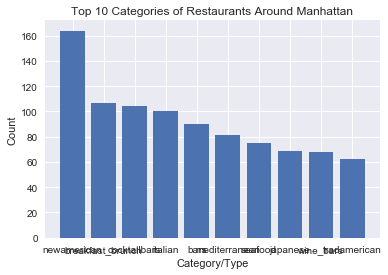

In [27]:
name_x = name[:10]
count_y = count[:10]
plt.bar(name_x, count_y)
plt.xlabel('Category/Type')
plt.ylabel('Count')
plt.title('Top 10 Categories of Restaurants Around Manhattan')
plt.show()

### 3. Restaurants By Ratings

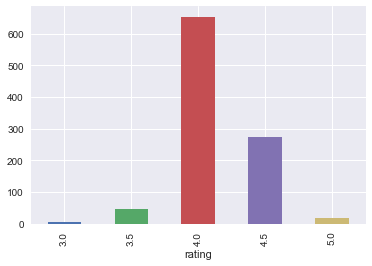

In [28]:
business.groupby('rating').size().plot(kind='bar')

### 4. Restaurants By Distance Group

In [29]:
business.distance.describe()
min_dist = min(business.distance)
max_dist = max(business.distance)
print(f'Minimum distance from the pin is {min_dist} meters.\n'
      f'Maximum distance from the pin is {max_dist} meters.')

Minimum distance from the pin is 63.99176427586096 meters.
Maximum distance from the pin is 7065.766844871299 meters.



#### Rearrange distance into distance groups
#### Group1: 0-1000 m, Group2: 1000-2000m, Group3: 2000-3000 m, Group4: 3000-4000 m
#### Group5: 4000-5000m, Group6: 5000-6000 m, Group7: 6000-7000 m, Group8: 7000-8000 m,

In [30]:
def group_dist(x):
    if 0 <= x < 1000: return '0-1000m'
    elif 1000 <= x < 2000: return '1000-2000m'
    elif 2000 <= x < 3000: return '2000-3000m'
    elif 3000 <= x < 4000: return '3000-4000m'
    elif 4000 <= x < 5000: return '4000-5000m'
    elif 5000 <= x < 6000: return '5000-6000m'
    elif 6000 <= x < 7000: return '6000-7000m'
    else: return '7000-8000m'
business['dist_group'] = business['distance'].apply(lambda x: group_dist(x))

In [31]:
# business.head()

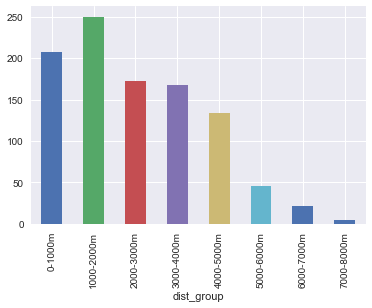

In [32]:
business.groupby('dist_group').size().plot(kind='bar')

### 5. Restaurants By Price

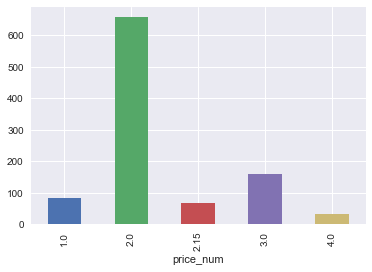

In [33]:
business.groupby('price_num').size().plot(kind='bar')

### 6. Restaurants By Transaction Services Providing

In [34]:
#business_pickup = business[business['pickup'] == True]
#business_pickup

In [36]:
transactions = business.groupby(['delivery','pickup','restaurant_reservation']).size().unstack()
transactions

restaurant_reservation  False  True 
delivery pickup                     
False    False            386     60
         True               9     11
True     False             12      2
         True             399    121

In [37]:
# With price level
transactions = business.groupby(['delivery','pickup','restaurant_reservation','price_num']).size().unstack()
transactions

price_num                               1.00   2.00  2.15  3.00  4.00
delivery pickup restaurant_reservation                               
False    False  False                   33.0  192.0  43.0  94.0  24.0
                True                     NaN   41.0   1.0  14.0   4.0
         True   False                    1.0    6.0   1.0   1.0   NaN
                True                     NaN    9.0   NaN   2.0   NaN
True     False  False                    1.0    9.0   1.0   1.0   NaN
                True                     NaN    1.0   NaN   NaN   1.0
         True   False                   48.0  298.0  18.0  32.0   3.0
                True                     NaN  102.0   4.0  15.0   NaN

### 7. Possible Correlation between Ratings, Price and Review Numbers 

In [38]:
# NOT REALLY....
# ONLY if have pickup service, most likely have delivery service
corr = business[['rating', 'price_num', 'review_count', 'pickup','delivery','restaurant_reservation']].corr()
corr

,rating,price_num,review_count,pickup,delivery,restaurant_reservation
rating,1.000000,-0.001421,-0.198951,-0.047855,-0.066158,-0.007048
price_num,-0.001421,1.000000,0.049157,-0.239989,-0.236717,0.053988
review_count,-0.198951,0.049157,1.000000,-0.007820,0.001856,-0.042776
pickup,-0.047855,-0.239989,-0.007820,1.000000,0.931696,0.138217
delivery,-0.066158,-0.236717,0.001856,0.931696,1.000000,0.098369
restaurant_reservation,-0.007048,0.053988,-0.042776,0.138217,0.098369,1.000000


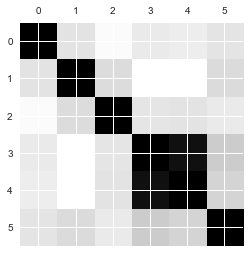

In [39]:
plt.matshow(corr)
plt.show()

In [40]:
business.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,...,url,price_num,address,zip,latitude,longitude,pickup,delivery,restaurant_reservation,dist_group
0,barn-joo-35-new-york,"[korean, gastropubs, tapasmallplates]","{'latitude': 40.74964, 'longitude': -73.98582}",(212) 564-4430,1325.406263,xZ96vaoL-cQjfotmUKtjJQ,https://s3-media1.fl.yelpcdn.com/bphoto/1R5CgY...,False,"{'address1': '34 W 35th St', 'address2': '', '...",Barn Joo 35,...,https://www.yelp.com/biz/barn-joo-35-new-york?...,2.00,"34 W 35th St, New York, NY 10001",10001,40.749640,-73.985820,True,True,True,1000-2000m
1,chama-mama-new-york,[georgian],"{'latitude': 40.7384, 'longitude': -73.99892}",(646) 438-9007,2966.180331,cTE0e96GYzet799EJeStoQ,https://s3-media3.fl.yelpcdn.com/bphoto/qRZaBn...,False,"{'address1': '149 W 14th St', 'address2': None...",Chama Mama,...,https://www.yelp.com/biz/chama-mama-new-york?a...,2.15,"149 W 14th St, New York, NY 10011",10011,40.738400,-73.998920,False,False,False,2000-3000m
2,jacobs-pickles-new-york,"[comfortfood, southern, tradamerican]","{'latitude': 40.7866504411994, 'longitude': -7...",(212) 470-5566,2950.127195,xt4sa64WOrpJvZBDPNPNYg,https://s3-media2.fl.yelpcdn.com/bphoto/167Rl2...,False,"{'address1': '509 Amsterdam Ave', 'address2': ...",Jacob's Pickles,...,https://www.yelp.com/biz/jacobs-pickles-new-yo...,2.00,"509 Amsterdam Ave, New York, NY 10024",10024,40.786650,-73.975528,False,False,False,2000-3000m
3,amélie-new-york,"[french, wine_bars]","{'latitude': 40.7327, 'longitude': -73.99766}",(212) 533-2962,3464.466994,ETgJqJHV7BW6pIr9Ox74sA,https://s3-media4.fl.yelpcdn.com/bphoto/cSDgVu...,False,"{'address1': '22 W 8th St', 'address2': '', 'a...",Amélie,...,https://www.yelp.com/biz/am%C3%A9lie-new-york?...,2.00,"22 W 8th St, New York, NY 10011",10011,40.732700,-73.997660,False,False,True,3000-4000m
4,upstate-new-york-2,"[seafood, wine_bars, beerbar]","{'latitude': 40.7263139141197, 'longitude': -7...",(646) 791-5400,3829.239035,ehUuSk5gPTCQmwS_ubgKRA,https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU...,False,"{'address1': '95 1st Ave', 'address2': '', 'ad...",Upstate,...,https://www.yelp.com/biz/upstate-new-york-2?ad...,2.00,"95 1st Ave, New York, NY 10003",10003,40.726314,-73.986490,False,False,True,3000-4000m


#### From the general descriptives over 1000 restaurants, we found 'newamerican' most popular restaurant tag, this type of restaurant is the most popular one in Manhattan, so we choose to open a 'newamerican' type of restaurant

In [45]:
# Identify if a restaurant is newamerican or not
business['newamerican'] = business['categories'].apply(lambda x: 'newamerican' in x)

# Dataframe with only NewAmerican Restaurants
newamerican = business[business['newamerican'] == True]

In [46]:
newamerican

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,...,price_num,address,zip,latitude,longitude,pickup,delivery,restaurant_reservation,dist_group,newamerican
5,burger-and-lobster-new-york-4,"[seafood, burgers, newamerican]","{'latitude': 40.74007, 'longitude': -73.99344}",(646) 833-7532,2569.517134,UA2M9QFZghe-9th2KwLoWQ,https://s3-media3.fl.yelpcdn.com/bphoto/1rHd7F...,False,"{'address1': '39 W 19th St', 'address2': '', '...",Burger & Lobster,...,2.00,"39 W 19th St, New York, NY 10011",10011,40.740070,-73.993440,True,True,True,2000-3000m,True
6,district-social-new-york,"[bars, newamerican]","{'latitude': 40.75369, 'longitude': -73.99136}",(212) 994-9599,1304.929447,eTR6nfHvQzvKX7Dcd6JrfA,https://s3-media4.fl.yelpcdn.com/bphoto/1H7eai...,False,"{'address1': '252 W 37th St', 'address2': None...",District Social,...,2.00,"252 W 37th St, New York, NY 10018",10018,40.753690,-73.991360,False,False,True,1000-2000m,True
7,bea-new-york,"[newamerican, cocktailbars]","{'latitude': 40.7591968, 'longitude': -73.9923...",(212) 602-1910,1170.800689,Rc1lxc5lSKJYd162JHNMfQ,https://s3-media2.fl.yelpcdn.com/bphoto/MsmtaE...,False,"{'address1': '403 W 43rd St', 'address2': '', ...",Bea,...,2.00,"403 W 43rd St, New York, NY 10036",10036,40.759197,-73.992336,False,False,True,1000-2000m,True
10,the-smith-new-york-2,"[newamerican, breakfast_brunch, cocktailbars]","{'latitude': 40.755165, 'longitude': -73.967868}",(212) 644-2700,1057.022965,C-8mGN7lt5rIraO5n-15ug,https://s3-media1.fl.yelpcdn.com/bphoto/fGAZCd...,False,"{'address1': '956 2nd Ave', 'address2': '', 'a...",The Smith,...,2.00,"956 2nd Ave, New York, NY 10022",10022,40.755165,-73.967868,True,True,False,1000-2000m,True
11,tanner-smiths-new-york-2,"[cocktailbars, newamerican, speakeasies]","{'latitude': 40.76442, 'longitude': -73.98169}",(646) 590-2034,525.594135,z5hRX3iJ5Ty_S38iG_WY3Q,https://s3-media2.fl.yelpcdn.com/bphoto/Fg0W28...,False,"{'address1': '204 W 55th St', 'address2': '', ...",Tanner Smiths,...,2.00,"204 W 55th St, New York, NY 10019",10019,40.764420,-73.981690,True,False,False,0-1000m,True
13,anytime-new-york,"[korean, newamerican, tapasmallplates]","{'latitude': 40.74779, 'longitude': -73.98674}",(646) 669-7733,1534.173041,VvsZAnEwU4c8Xkyrzx05Nw,https://s3-media2.fl.yelpcdn.com/bphoto/8GuUNv...,False,"{'address1': '23 W 32nd St', 'address2': 'Fl 3...",Anytime,...,2.00,"23 W 32nd St, Fl 3, New York, NY 10001",10001,40.747790,-73.986740,False,False,True,1000-2000m,True
14,dutch-freds-new-york-2,"[cocktailbars, newamerican, breakfast_brunch]","{'latitude': 40.76071, 'longitude': -73.98793}",(646) 918-6923,790.067783,SaYTVG7wHCMDBofHCgXPaA,https://s3-media3.fl.yelpcdn.com/bphoto/IutYzs...,False,"{'address1': '307 W 47th St', 'address2': None...",Dutch Freds,...,2.00,"307 W 47th St, New York, NY 10036",10036,40.760710,-73.987930,False,False,False,0-1000m,True
26,death-ave-new-york-5,"[greek, newamerican, gastropubs]","{'latitude': 40.75112, 'longitude': -74.00208}",(212) 695-8080,2226.199421,PHSsvGDW6Rh2pGWEDTrDew,https://s3-media3.fl.yelpcdn.com/bphoto/onEmsN...,False,"{'address1': '315 10th Ave', 'address2': '', '...",Death Ave,...,2.00,"315 10th Ave, New York, NY 10001",10001,40.751120,-74.002080,True,True,True,2000-3000m,True
27,momofuku-noodle-bar-new-york-5,"[newamerican, noodles]","{'latitude': 40.76847, 'longitude': -73.983092}",,1007.617634,Pr-q47vsmM4aoc2t_Sfk8w,https://s3-media2.fl.yelpcdn.com/bphoto/hi5p5-...,False,"{'address1': '10 Columbus Cir', 'address2': 'T...",Momofuku Noodle Bar,...,2.15,"10 Columbus Cir, Third Floor, New York, NY 10019",10019,40.768470,-73.983092,False,False,False,1000-2000m,True
30,momofuku-nishi-new-york,"[italian, newamerican]","{'latitude': 40.7443479, 'longitude': -73.9988...",(646) 518-1919,2457.288129,os09iVkYkzIg9G1xEIepiA,https://s3-media4.fl.yelpcdn.com/bphoto/KkuIPo...,False,"{'address1': '232 8th Ave', 'address2': '', 'a...",Momofuku Nishi,...,2.00,"232 8th Ave, New York, NY 10011",10011,40.74

In [49]:
zip_groups = newamerican.groupby("zip")
sizes = pd.DataFrame(zip_groups.size())
sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
import folium

#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data='zipcode.geojson', data=sizes,
             columns=[ 'zip','size'],
             key_on='feature.properties.postalCode',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Incidents')
folium.LayerControl().add_to(m)
m

#### Find Restaurant that have the same type

In [161]:
# 给一个restaurant type，找出相同type的resturant
# given the input restaurant type want to get, return only the restaurants that are same type
def select_type(df, input_type):
    input_type = 'newamerican'
    result = [input_type in df['categories'][i] for i in range(N)]
    df_typed=df[result]
    return df_typed

#### Find Restaurant within the Given Distance

In [ ]:
def select_distance(df,distance=2000):
    df['distance']=df.get('distance').apply(lambda x:x<=distance)
    df = df[df['distance']==True]
    return df

### Combine Selecting Type and Distance

In [ ]:
def select_type_dist(df,input_type = 'newamerican',distance=2000):
    N = len(df)
    # Find restaurants of Type wantted
    result = [input_type in df['categories'][i] for i in range(N)]
    df = df[result]
    # Find restaurants within range of interest
    df['distance'] = df.get('distance').apply(lambda x:x <= distance)
    df = df[df['distance']==True]
    return df

### Heat Map Based on Zipcode

In [48]:
zip_groups = business.groupby("zip")
sizes = pd.DataFrame(zip_groups.size())
sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
import folium

#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data='zipcode.geojson', data=sizes,
             columns=[ 'zip','size'],
             key_on='feature.properties.postalCode',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Incidents')
folium.LayerControl().add_to(m)
m